In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [3]:
# read data
df = pd.read_csv("concrete (2).csv")
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
# null or unwanted values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
# feature, target and train,test split
X = df.drop("Strength", axis=1)
y = df["Strength"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
# scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# We can start with 3 layers (2 Hidden layers and one output layer)

In [8]:
X.shape

(1030, 8)

In [9]:
X.shape[1]

8

In [10]:
# Neural network

model = Sequential()
model.add(Dense(16, activation="tanh", input_dim=X.shape[1]))
# in input_dim, we dont need to pass hard coded value bcoz for large datasets, we actually dont know the exact no.of features, so use X.shape[1]
model.add(Dense(8, activation="tanh"))
model.add(Dense(1))
model.summary()

C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

#Next is, u have to pass model.compile() function in which u have to pass 2 parameters......OPTIMISERS AND LOSS

#Since we are using REGRESSION Problem, loss will be MSE only, but for optimisers, u may have options like adam, sgd, mbgd etc.....

#suppose u have used adam optimisers, no issue, go ahead with this but suppose someone is very specfic of choosing optimiser with learning rate, want to choose own value of momentum , in that case u can search on KERAS.OPTIMISERS(refer doc) and u can have any optimisers....see below

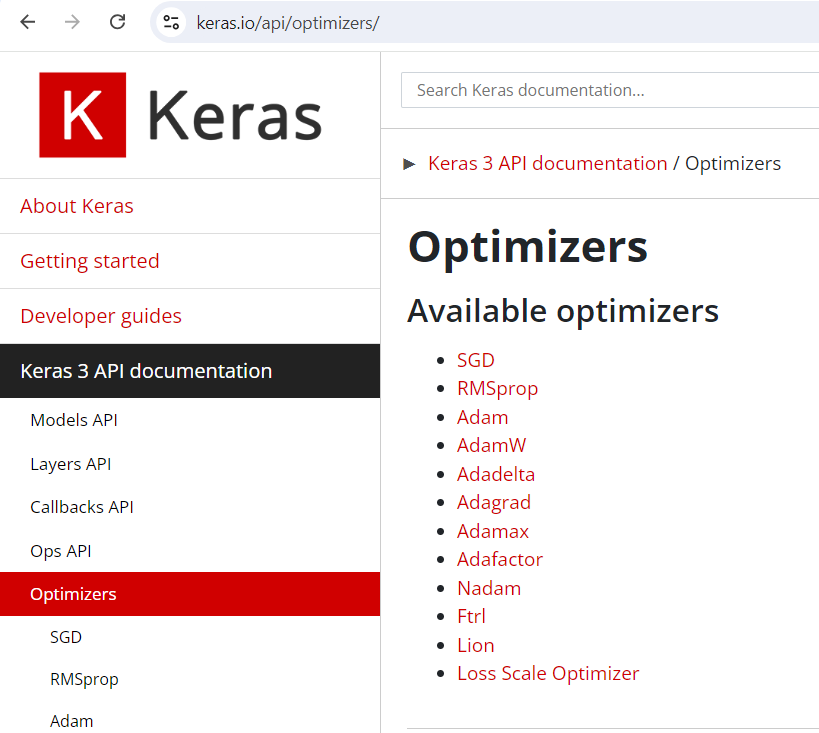



#U can also choose different kind of losses based on the data.....go to keras.losses.......see below

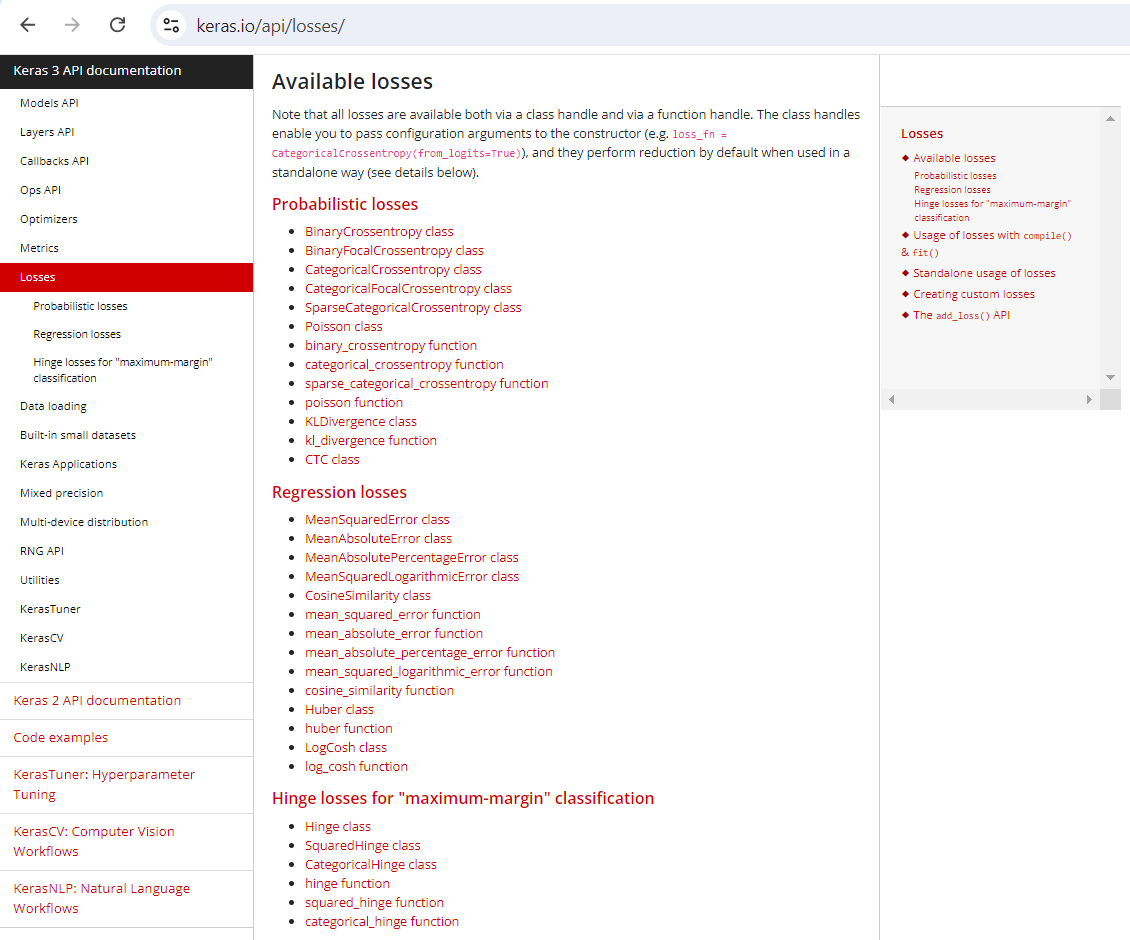

# If u want to use optimisers & losses of ur choice then u can go as shown below....

In [11]:
# from tensorflow.keras.optimizers import SGD
# model.compile(optimizer=SGD(learning_rate=0.03), loss="mse")
# see above, if u r using SGD, then learning rate u can choose according to ur wish but by default, learning rate is 0.01
# model.compile(optimizer="SGD", loss="mse") default learning_rate=0.01

In [12]:
# default learning rate
model.compile(optimizer="adam", loss="mse")

# We have learned batch size in MBGD concept but u can also give batch_size with ADAM optimisers, training will happen in batches.

#The only difference between MBGD and ADAM is, in MBGD we have FIXED LEARNING RATE and in case of ADAM, we have ADAPTIVE LEARNING RATE plus here also we have a concept of MOMENTUM.

# but I also would like to visualise how the training is going, so while the training happens, I will store the whole code in some variable (say train_history)

In [13]:
#model.fit(X_train_scaled, y_train, epochs=10, batch_size=32) # can pass the batch_size with ADAM as well.
train_history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1575.0923
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1518.8925
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1576.7437
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1545.4904
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1447.6837
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1399.4592
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1342.2903
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1333.7030
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1279.8805
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1294.1917


# see the loss value, the last value is not reduced much .....it is reduced just from 1576 to 1311.

# There is no much diffrence.

# I would also like to plot LOSS

In [14]:
train_history.history['loss']

[1549.549560546875,
 1530.6156005859375,
 1510.560546875,
 1487.30859375,
 1459.7076416015625,
 1428.715576171875,
 1393.3819580078125,
 1353.6923828125,
 1309.6409912109375,
 1264.0755615234375]

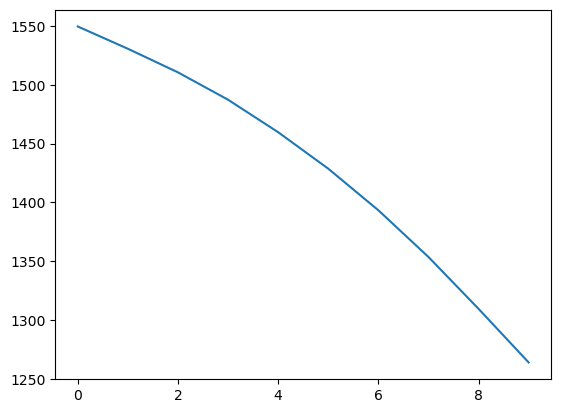

In [15]:
plt.plot(train_history.history['loss'])
plt.show()

# see the plot, we can see how the progress is?......but it is not the way it should be.......so actually we are not satisfied with this......I want to decrease it even more.....

#so change the no.of layers (here make it 4) and activation function (as ReLU)

In [16]:
# Neural network

model = Sequential()
model.add(Dense(32, activation="relu", input_dim=X.shape[1])) # see here I have used thumb rule 16,32,64 ......
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1))
model.summary()

C:\Users\Kaustubh Jadhav\Downloads\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,889 (7.38 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# default learning rate
model.compile(optimizer="adam", loss="mse")

In [18]:
#model.fit(X_train_scaled, y_train, epochs=15, batch_size=16)
train_history=model.fit(X_train_scaled, y_train, epochs=15, batch_size=16) # can pass the batch_size with ADAM as well.

Epoch 1/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1404.9211
Epoch 2/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1194.9536
Epoch 3/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 420.9582
Epoch 4/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 215.8838
Epoch 5/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 181.9851
Epoch 6/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 193.2571
Epoch 7/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 160.6147
Epoch 8/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 150.2577
Epoch 9/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 145.5386
Epoch 10/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 142.0098
Epoch 11/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 154.5481
Epoch 12/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 148.5759
Epoch 13/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 128.3371
Epoch 14/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 123.8050
Epoch 15/15
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

#As u can see above, there is a huge difference in loss value......there is a huge decrease in loss function.

#One more thing u can notice ......WHAT IS EPOCH 46/46?
#It is no.of BP in 1 EPOCH. So in every epoch, we are having 46 BP.

#Verify the above thing using X_TRAIN.SHAPE (721/16= 45.06)...there are total 721 datapoints while training model and we have taken batch size = 16

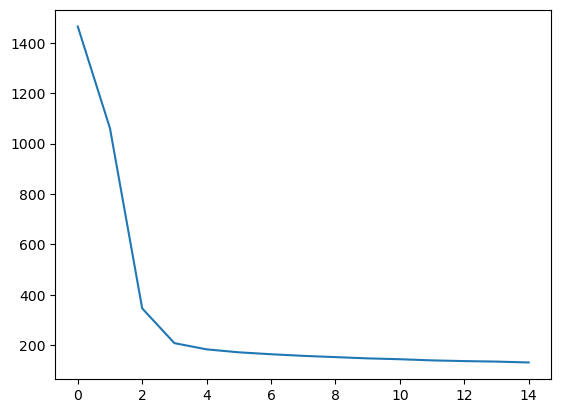

In [19]:
plt.plot(train_history.history['loss'])
plt.show()

In [20]:
# evaluate on testing data

model.evaluate(X_test_scaled,y_test,batch_size=16) #309/16 = 19.06 (20), default batch size = 32

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155.5813  


161.24569702148438

In [21]:
X_test.shape

(309, 8)

In [22]:
# prediction
y_pred = model.predict(X_test_scaled)
y_pred

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[25.978077],
       [16.058352],
       [18.630749],
       [18.723099],
       [40.99371 ],
       [43.450573],
       [21.185581],
       [37.74379 ],
       [24.627388],
       [41.16004 ],
       [53.115063],
       [16.218044],
       [20.488007],
       [25.44944 ],
       [17.70982 ],
       [31.688972],
       [57.70456 ],
       [40.494564],
       [51.21791 ],
       [27.23093 ],
       [24.005417],
       [40.069508],
       [20.10893 ],
       [45.339024],
       [55.43846 ],
       [25.7221  ],
       [22.406923],
       [35.896706],
       [19.880205],
       [19.177225],
       [67.51688 ],
       [43.094048],
       [20.401684],
       [36.788742],
       [52.87226 ],
       [23.353016],
       [19.637508],
       [20.069984],
       [27.926283],
       [19.733688],
       [52.72555 ],
       [21.240303],
       [53.132584],
       [37.371784],
       [25.714466],
       [33.00855 ],
       [22.373394],
       [22.396744],
       [58.779087],
       [40.63919 ],
